In [5]:
import pandas as pd
import urllib.request
import numpy as np 
data = pd.read_csv('churndata.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

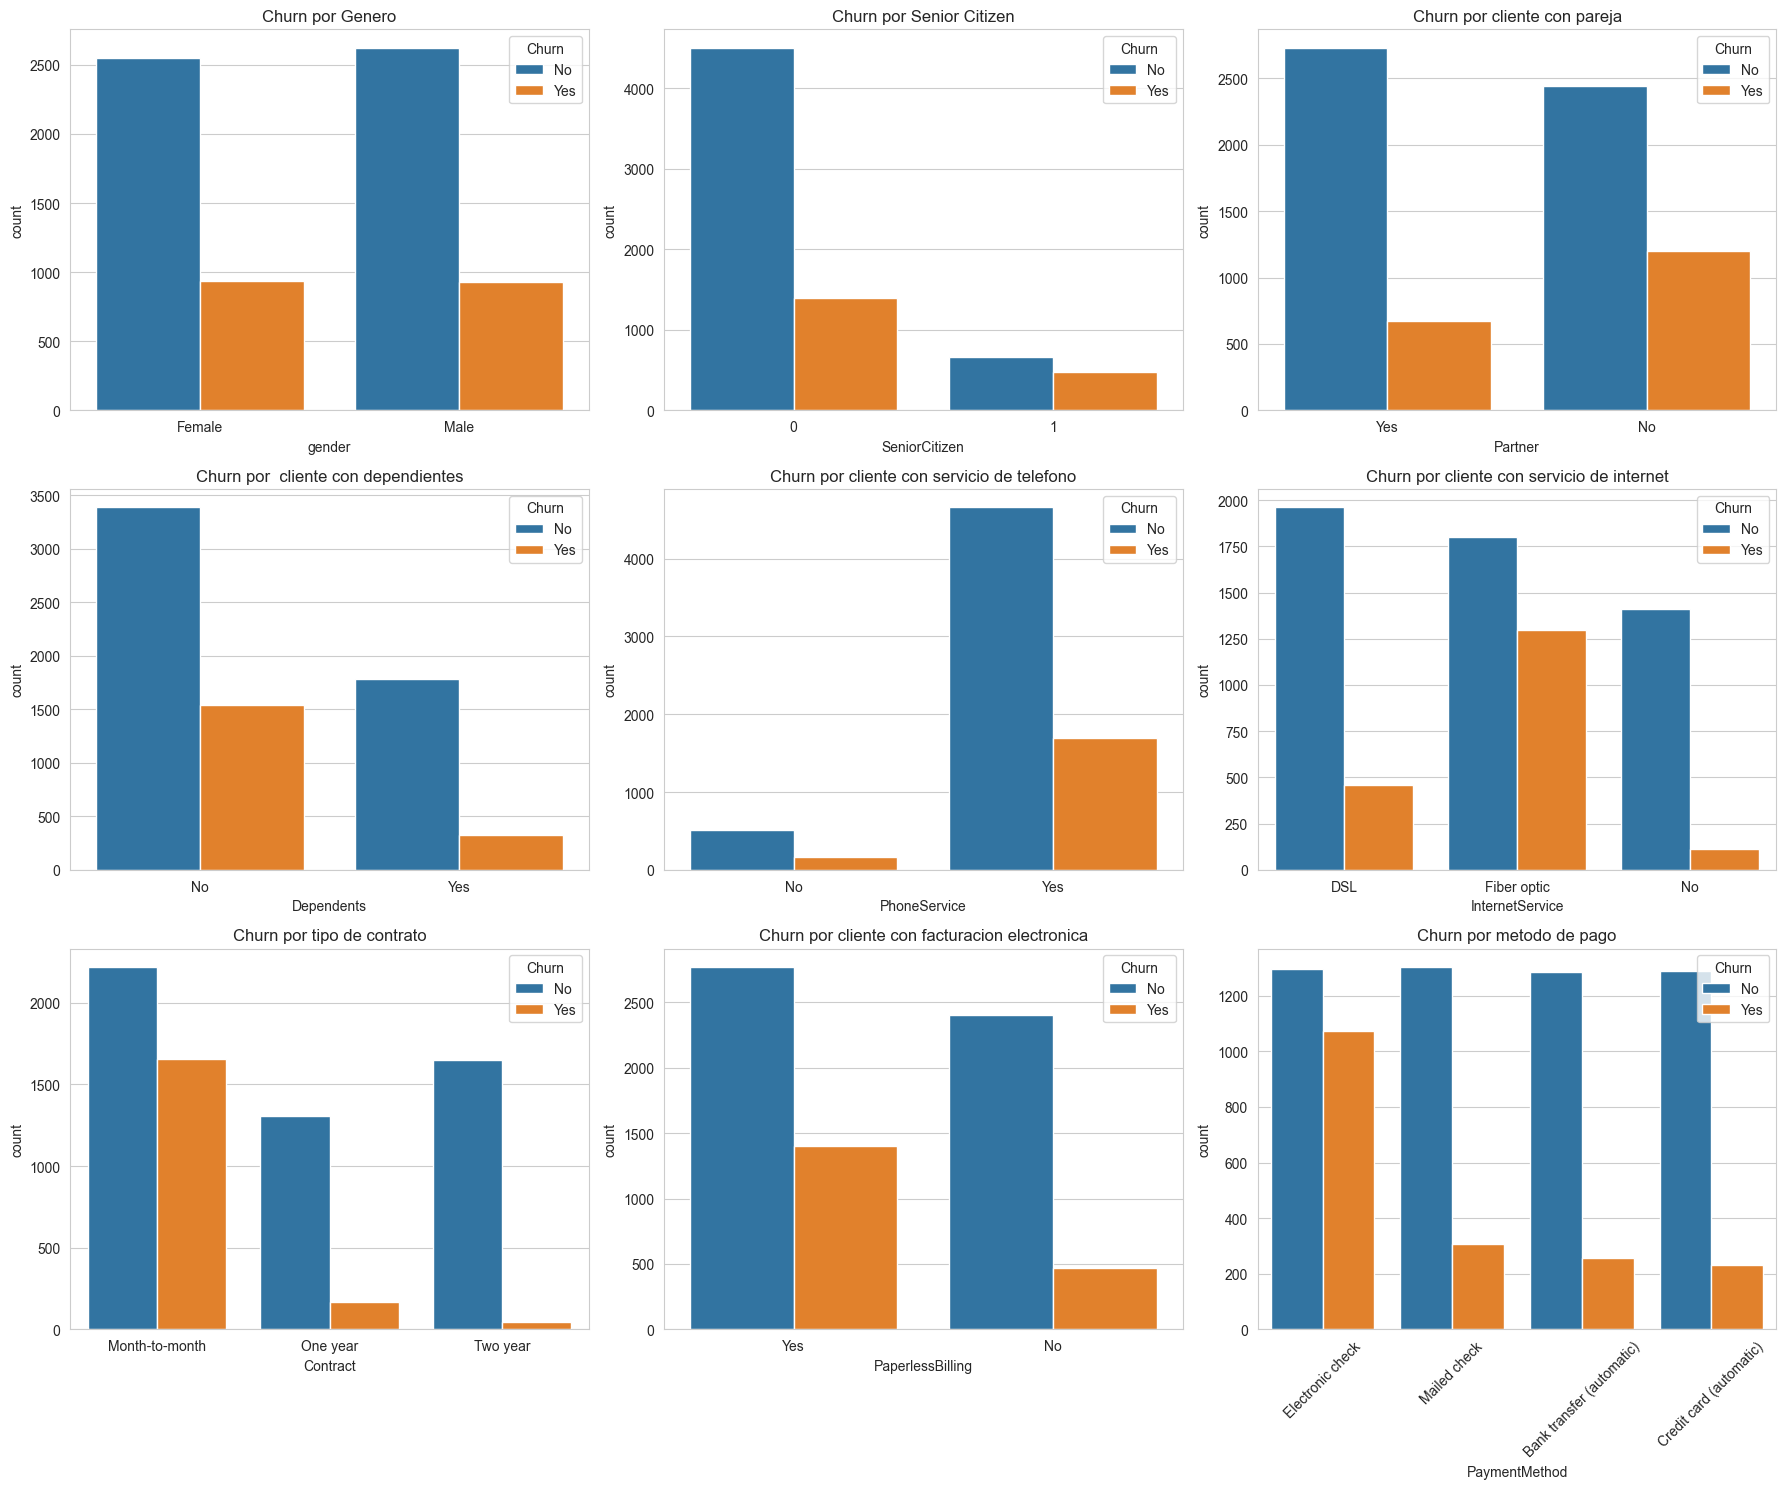

In [6]:
# matplotlib.pyplot, seaborn, y ssl para generar gráficos y ajustar el estilo de Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import ssl


# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Crear una figura con varios subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Visualizar la distribución de variables categóricas en relación con el churn
sns.countplot(data=data, x='gender', hue='Churn', ax=axes[0, 0])
axes[0, 0].set_title('Churn por Genero')

sns.countplot(data=data, x='SeniorCitizen', hue='Churn', ax=axes[0, 1])
axes[0, 1].set_title('Churn por Senior Citizen')

sns.countplot(data=data, x='Partner', hue='Churn', ax=axes[0, 2])
axes[0, 2].set_title('Churn por cliente con pareja')

sns.countplot(data=data, x='Dependents', hue='Churn', ax=axes[1, 0])
axes[1, 0].set_title('Churn por  cliente con dependientes')

sns.countplot(data=data, x='PhoneService', hue='Churn', ax=axes[1, 1])
axes[1, 1].set_title('Churn por cliente con servicio de telefono')

sns.countplot(data=data, x='InternetService', hue='Churn', ax=axes[1, 2])
axes[1, 2].set_title('Churn por cliente con servicio de internet')

sns.countplot(data=data, x='Contract', hue='Churn', ax=axes[2, 0])
axes[2, 0].set_title('Churn por tipo de contrato')

sns.countplot(data=data, x='PaperlessBilling', hue='Churn', ax=axes[2, 1])
axes[2, 1].set_title('Churn por cliente con facturacion electronica')

sns.countplot(data=data, x='PaymentMethod', hue='Churn', ax=axes[2, 2])
axes[2, 2].set_title('Churn por metodo de pago')
axes[2, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

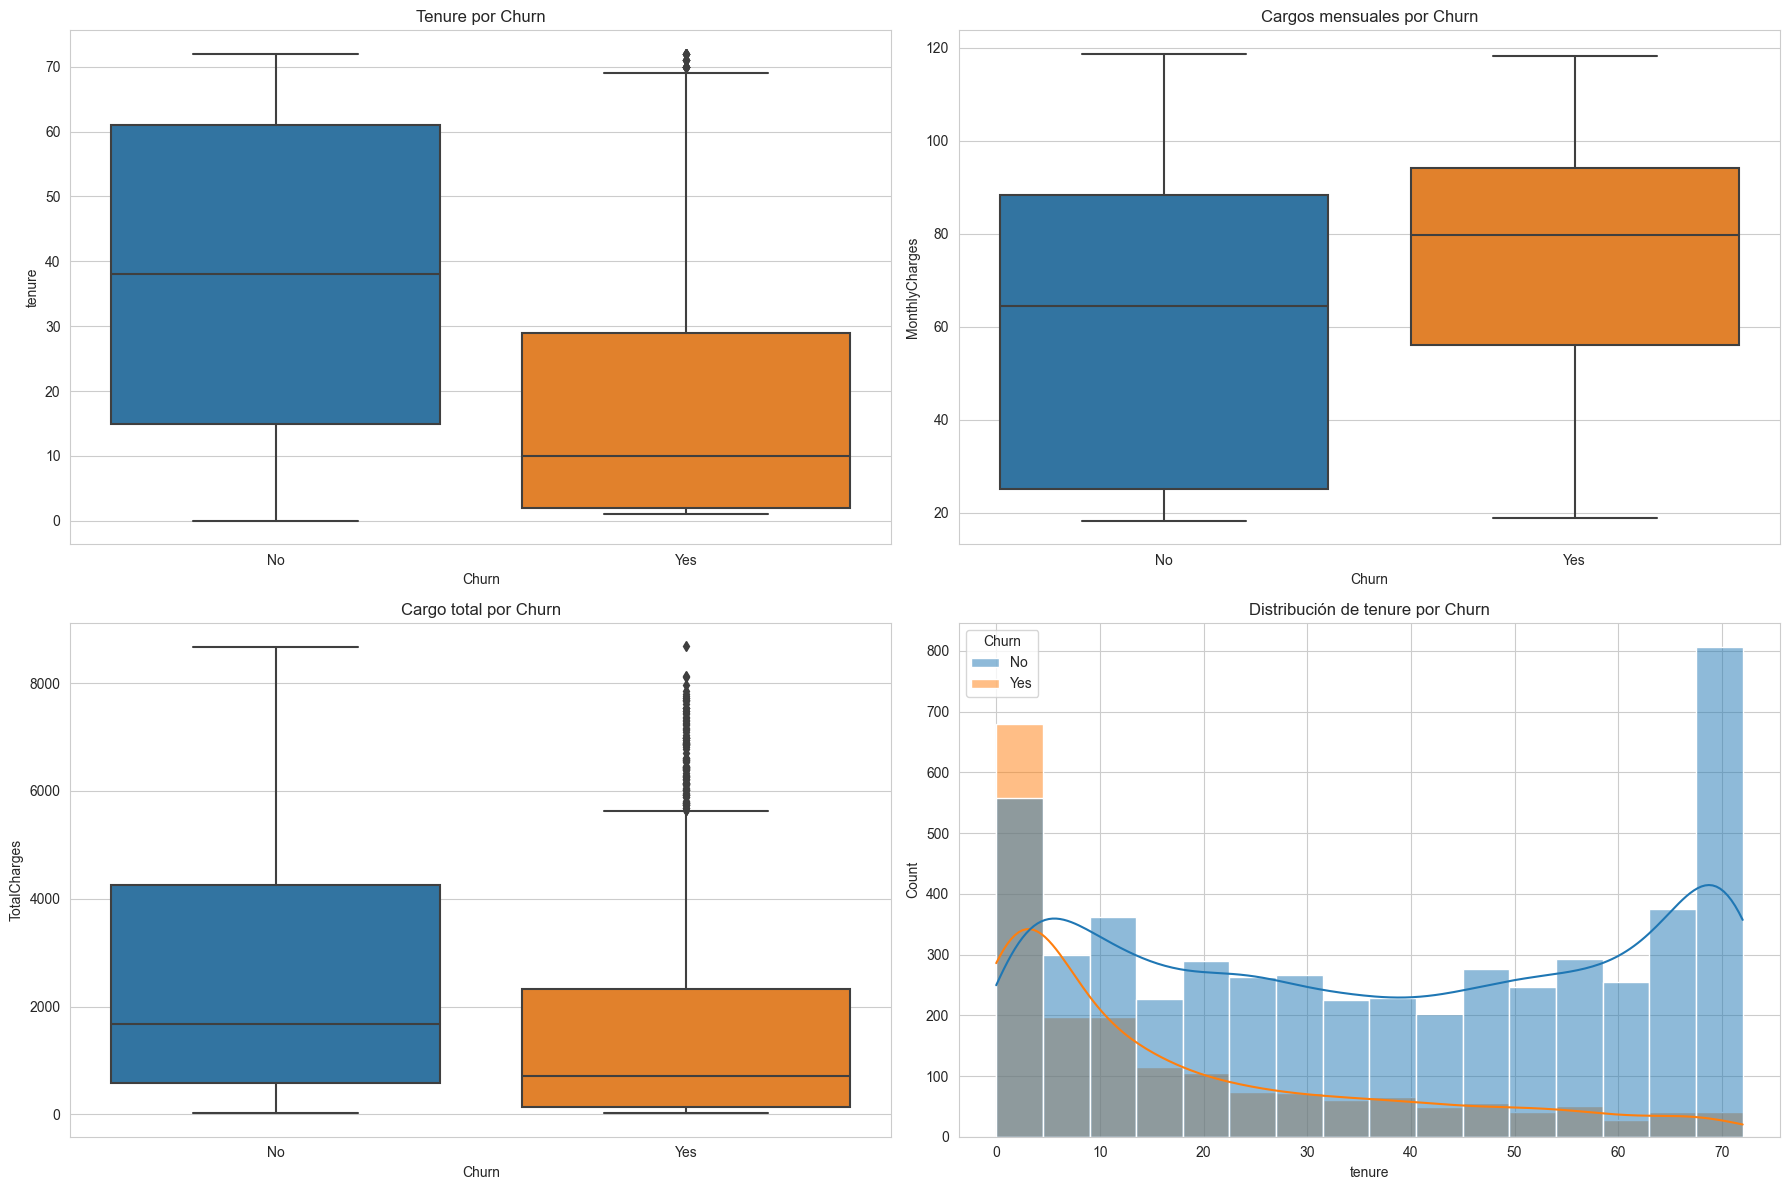

In [7]:
# Crear una figura con varios subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Visualizar la distribución de variables continuas en relación con el churn
sns.boxplot(data=data, x='Churn', y='tenure', ax=axes[0, 0])
axes[0, 0].set_title('Tenure por Churn')

sns.boxplot(data=data, x='Churn', y='MonthlyCharges', ax=axes[0, 1])
axes[0, 1].set_title('Cargos mensuales por Churn')

# Convertir la columna 'TotalCharges' a numérica, manejando errores con 'coerce'
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
sns.boxplot(data=data, x='Churn', y='TotalCharges', ax=axes[1, 0])
axes[1, 0].set_title('Cargo total por Churn')

# Histograma de tenure
sns.histplot(data=data, x='tenure', hue='Churn', ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribución de tenure por Churn')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Verificar valores faltantes en el dataset
missing_values = data.isnull().sum()

# Descartar la columna 'customerID' ya que no es relevante para el modelo
data = data.drop(columns=['customerID'])

# Codificar las variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
categorical_columns = data.select_dtypes(include=['object']).columns

# Llenar cualquier valor faltante en 'TotalCharges' con la mediana
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X = data.drop(columns=['Churn'])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

missing_values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar un árbol de decisión para obtener la importancia de las características
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = tree_classifier.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
17,MonthlyCharges,0.215873
18,TotalCharges,0.200148
14,Contract,0.166295
4,tenure,0.111674
16,PaymentMethod,0.046128
8,OnlineSecurity,0.044898
15,PaperlessBilling,0.028275
7,InternetService,0.026732
0,gender,0.023367
2,Partner,0.020851


Precisión del modelo de regresión logística:
0.815471965933286
Recall del modelo de regresión logística:
0.579088471849866
Precision del modelo de regresión logística:
0.677115987460815
F1 Score del modelo de regresión logística:
0.624277456647399
[[933 103]
 [157 216]]


<Figure size 800x600 with 0 Axes>

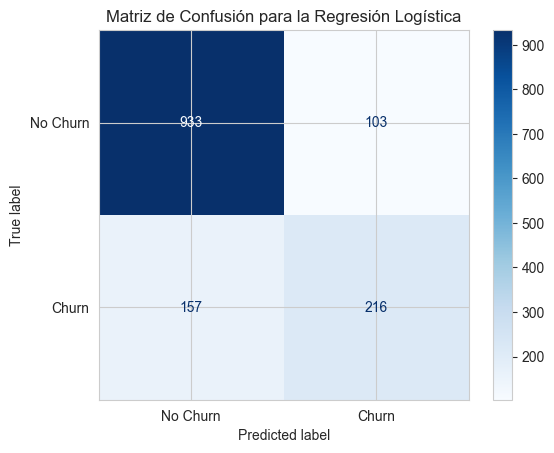

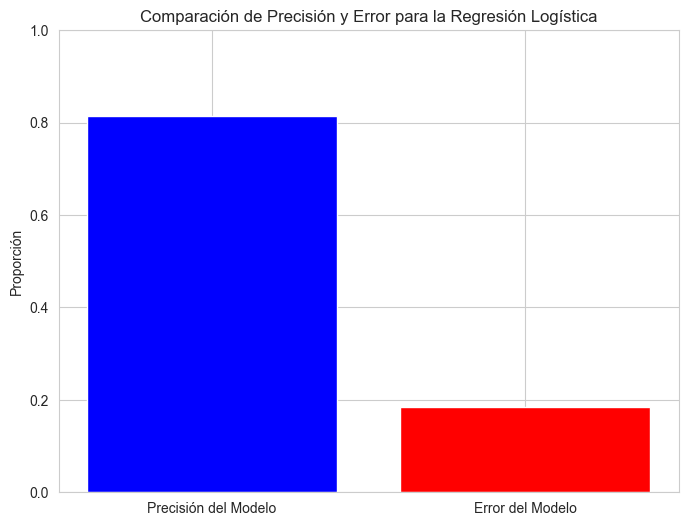

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Entrenar un modelo de regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)



# Calcular la precisión del modelo
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Precisión del modelo de regresión logística:")
print(accuracy_log_reg)
print("Recall del modelo de regresión logística:")
print(recall_score(y_test, y_pred_log_reg))
print("Precision del modelo de regresión logística:")
print(precision_score(y_test, y_pred_log_reg))
print("F1 Score del modelo de regresión logística:")
print(f1_score(y_test, y_pred_log_reg))
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print(conf_matrix)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay( conf_matrix ,display_labels=['No Churn', 'Churn']).plot(cmap='Blues' ,values_format='d')
plt.title("Matriz de Confusión para la Regresión Logística")
plt.show()

# Visualizar la precisión en un gráfico de barras
accuracies = [accuracy_log_reg, 1-accuracy_log_reg]
labels = ['Precisión del Modelo', 'Error del Modelo']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'red'])
plt.ylim(0, 1)
plt.ylabel("Proporción")
plt.title("Comparación de Precisión y Error para la Regresión Logística")
plt.show()

<Figure size 800x600 with 0 Axes>

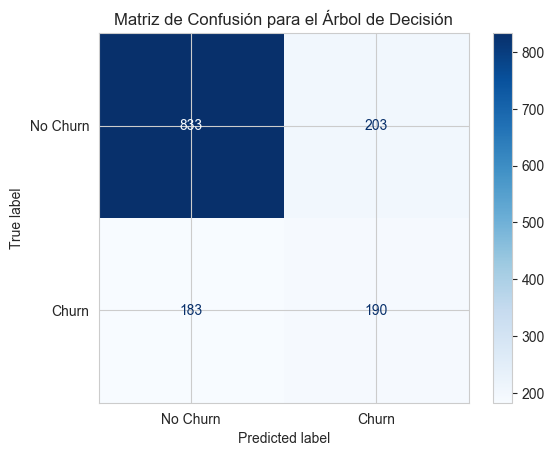

0.7260468417317246
[[833 203]
 [183 190]]
[[950  86]
 [186 187]]
0.8069552874378992


<Figure size 800x600 with 0 Axes>

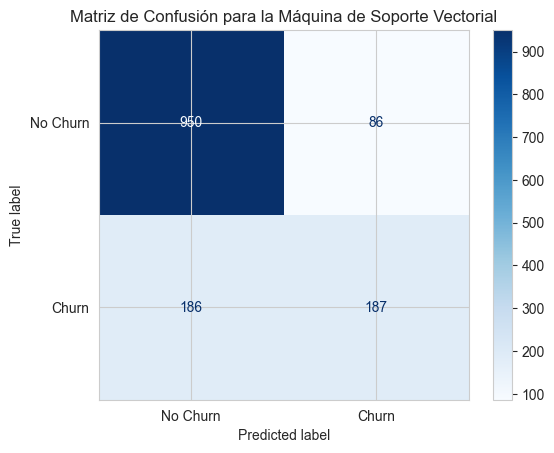

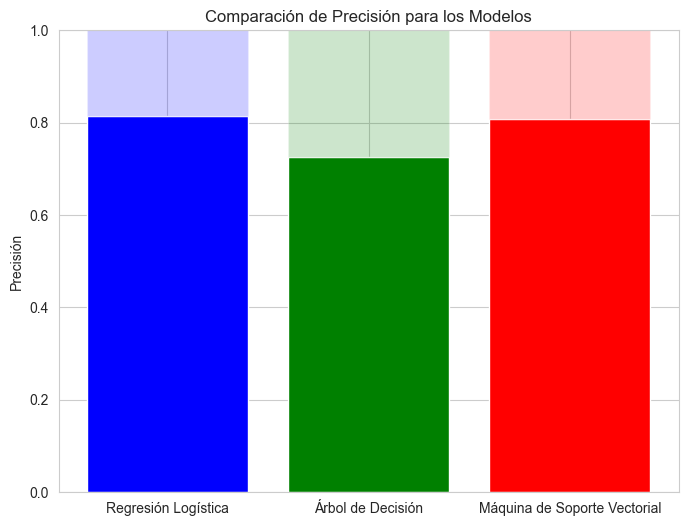

In [13]:
from sklearn.svm import SVC

# Entrenar un árbol de decisión
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_tree = tree_classifier.predict(X_test)
# Matriz de confusión de árbol de decisión
conf_matrix_arb = confusion_matrix(y_test, y_pred_tree)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay( conf_matrix_arb ,display_labels=['No Churn', 'Churn']).plot(cmap='Blues' ,values_format='d')
plt.title("Matriz de Confusión para el Árbol de Decisión")
plt.show()


# Calcular la precisión del modelo de árbol de decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Entrenar una máquina de soporte vectorial (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = svm_classifier.predict(X_test)


# Matriz de confusión de SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(accuracy_tree)
print(conf_matrix_arb)

print(conf_matrix_svm)


# Calcular la precisión del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm)

accuracy_tree, accuracy_svm

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay( conf_matrix_svm ,display_labels=['No Churn', 'Churn']).plot(cmap='Blues' ,values_format='d')
plt.title("Matriz de Confusión para la Máquina de Soporte Vectorial")
plt.show()

#  vamos a comparar la precisión de los modelos en un gráfico de barras con los errores de los modelos
accuracies = [accuracy_log_reg, accuracy_tree, accuracy_svm]
errors = [1-accuracy_log_reg, 1-accuracy_tree, 1-accuracy_svm]
labels = ['Regresión Logística', 'Árbol de Decisión', 'Máquina de Soporte Vectorial']

plt.figure(figsize=(8, 6))
# Barras con la precisión de los modelos y los errores
plt.bar(labels, accuracies, color=['blue', 'green', 'red'])
plt.bar(labels, errors, bottom=accuracies, color=['blue', 'green', 'red'], alpha=0.2)
plt.ylim(0, 1)
plt.ylabel("Precisión")
plt.title("Comparación de Precisión para los Modelos")
plt.show()

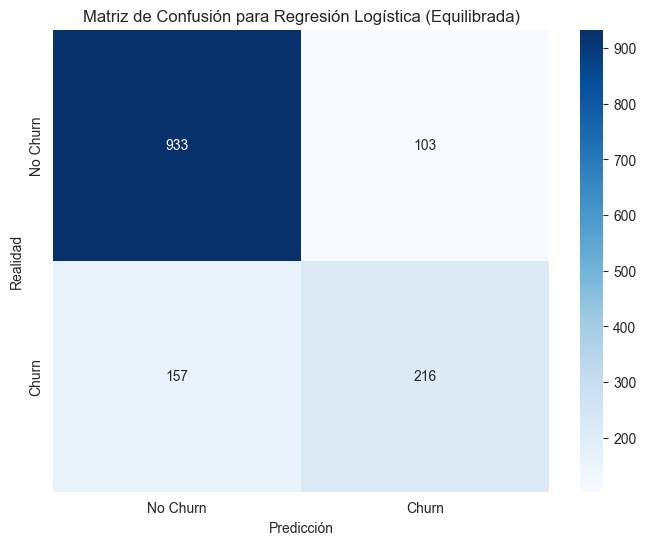

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

     Metric  Logistic Regression  Baseline Model
0  Accuracy             0.815472        0.735273
1    Recall             0.579088        0.000000
2  F1 Score             0.624277        0.623103


In [14]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report

# Calcular métricas adicionales para la regresión logística
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
confusion_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Modelo base: siempre predice "no churn"
base_preds = [0] * len(y_test)
accuracy_base = accuracy_score(y_test, base_preds)
recall_base = recall_score(y_test, base_preds)
f1_base = f1_score(y_test, base_preds, average='weighted')

metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_log_reg, recall_log_reg, f1_log_reg],
    'Baseline Model': [accuracy_base, recall_base, f1_base]
})

# Reporte de clasificación para la regresión logística
classification_rep = classification_report(y_test, y_pred_log_reg)

# metrics_summary, confusion_log_reg, classification_rep

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_log_reg, annot=True, fmt='g', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión para Regresión Logística (Equilibrada)')
plt.show()

# vamos a ver un reporte de metricas y clasificacion_report
print(classification_rep)
print(metrics_summary)

In [16]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

# Iniciar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y la precisión asociada
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_params, best_accuracy

c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Bartolomeo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Bartolomeo\AppData\Local\Progra

({'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}, 0.8001421589564082)

In [17]:
# Entrenar el modelo con los mejores hiperparámetros
best_log_reg = LogisticRegression(C=0.1, penalty='l1', solver='saga', max_iter=10000, random_state=42)
best_log_reg.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_best = best_log_reg.predict(X_test)

# Calcular la precisión del modelo ajustado
accuracy_best = accuracy_score(y_test, y_pred_best)

# Obtener los coeficientes del modelo para analizar la importancia de las características
coefficients = best_log_reg.coef_[0]
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
print('Precisión del modelo de regresión logística con búsqueda de cuadrícula:')
print(accuracy_best)
print('Coeficientes del modelo de regresión logística con búsqueda de cuadrícula:')
print(features_df)


Precisión del modelo de regresión logística con búsqueda de cuadrícula:
0.8204400283889283
Coeficientes del modelo de regresión logística con búsqueda de cuadrícula:
             Feature  Coefficient
17    MonthlyCharges     0.724907
18      TotalCharges     0.180937
15  PaperlessBilling     0.167463
7    InternetService     0.139755
1      SeniorCitizen     0.067183
6      MultipleLines     0.066151
16     PaymentMethod     0.053911
13   StreamingMovies     0.028230
2            Partner     0.004338
12       StreamingTV     0.000000
0             gender    -0.013604
10  DeviceProtection    -0.051596
3         Dependents    -0.066317
9       OnlineBackup    -0.117047
11       TechSupport    -0.210249
8     OnlineSecurity    -0.241471
5       PhoneService    -0.260231
14          Contract    -0.588962
4             tenure    -0.922568
